# BOSTON HOUSING PREDICTION PROJECT USING LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Loading the Dataset using the already built in data in scikit learn

In [2]:
from sklearn.datasets import load_boston

boston_data = load_boston()

Exploring the dataset and creating a DataFrame

In [3]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
data = pd.DataFrame(data = boston_data.data, columns = boston_data.feature_names)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [20]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Checking for any null values

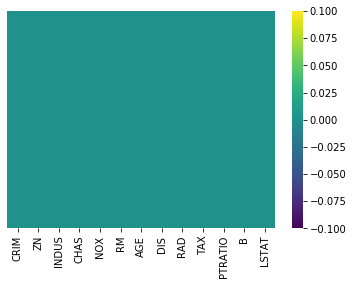

In [7]:
sns.heatmap(data.isnull(), yticklabels = False, cmap = 'viridis')


Creating the MEDV column in our dataset. That is the value that our model will predict.



In [8]:
data['MEDV'] = boston_data.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


EDA - Exploratory Data Analysis

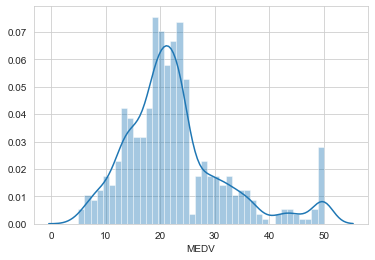

In [9]:
sns.set_style('whitegrid')
sns.distplot(data['MEDV'], bins = 40)


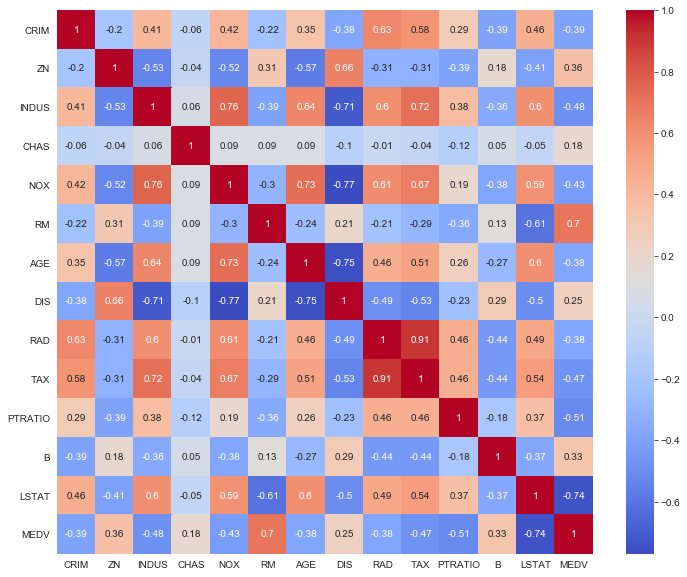

In [10]:
plt.figure(figsize=(12,10))
corrln = data.corr().round(2)
sns.heatmap(data = corrln, annot =True, cmap = 'coolwarm')

Exploring correlation of feature with the target. Here, from the heatmap, we see 'RM', 'LSTAT' and 'PTRATIO' are potential features for the same.

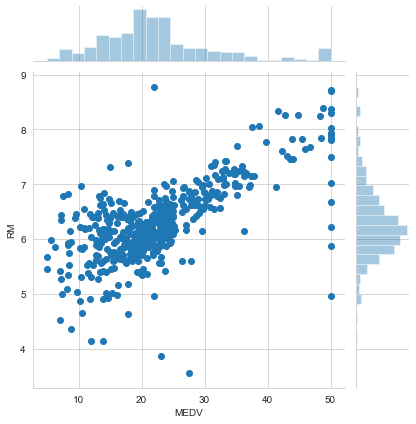

In [11]:
sns.jointplot(x = 'MEDV', y = 'RM', data = data)
#from the plot below we see a directly proportional relationship

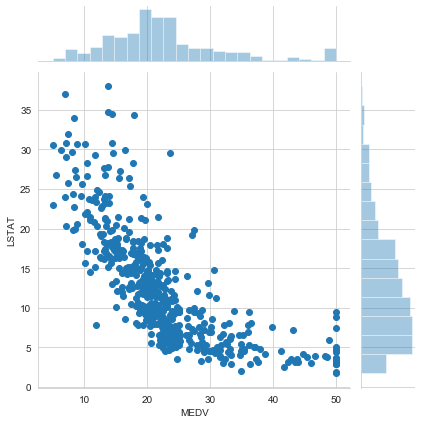

In [12]:
sns.jointplot(x = 'MEDV', y = 'LSTAT', data = data)
#from plot below we see an inversely proportional relationship 

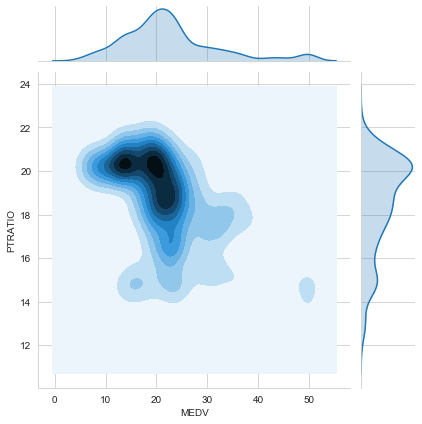

In [17]:
sns.jointplot(x = 'MEDV', y = 'PTRATIO', data = data, kind = 'kde')
#from plot below we see an inversely proportional relationship 

From the above plots, we have now established confirmations on the features of 'RM', 'LSTAT' and 'PTRATIO' being related to our target value. Hence, we will now create a DataFrame with these 3 features only.  

In [28]:
new_data = pd.DataFrame(np.c_[data['LSTAT'], data['RM'], data['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
new_data.head()

,LSTAT,RM,PTRATIO
0,4.98,6.575,15.3
1,9.14,6.421,17.8
2,4.03,7.185,17.8
3,2.94,6.998,18.7
4,5.33,7.147,18.7


In [29]:
prices = data['MEDV']

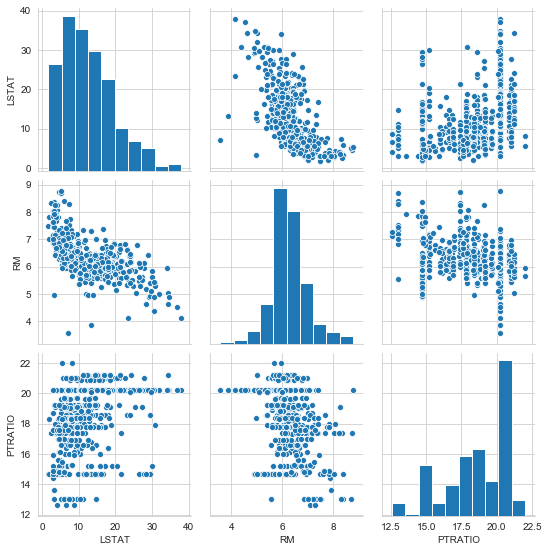

In [30]:
sns.pairplot(new_data)

Next, we split our data into train(70%) and test(30%) sets.

In [32]:
from sklearn.model_selection import train_test_split

X = new_data
y = prices


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Next, we import the Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We check our predictions based on our model.

In [37]:
predictions = lm.predict(X_test)

Checking the variation of predicted values with the actual values.

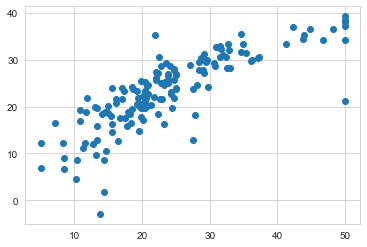

In [38]:
plt.scatter(y_test, predictions)

Checking performance of our model on test set.

In [39]:
from sklearn import metrics

In [40]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', metrics.r2_score(y_test, predictions))

RMSE: 5.780875350577411
R2 Score: 0.663323929315822


Checking performance of our model on training test.

In [48]:
train_pred = lm.predict(X_train)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R2 Score:', metrics.r2_score(y_train, train_pred))

RMSE: 4.955585851240799
R2 Score: 0.6811430471775612


THANK YOU!
